In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv('wine_data.csv')

In [5]:
df.head()

,Cultivator,Alcohol,Malicacid,Ash,Alcalinityofash,Magnesium,Totalphenols,Flavanoids,Nonflavanoidphenols,Proanthocyanins,Colorintensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Data Exploration

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cultivator,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malicacid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinityofash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Totalphenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoidphenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [13]:
df.isnull().sum()

Cultivator             0
Alcohol                0
Malicacid              0
Ash                    0
Alcalinityofash        0
Magnesium              0
Totalphenols           0
Flavanoids             0
Nonflavanoidphenols    0
Proanthocyanins        0
Colorintensity         0
Hue                    0
OD280                  0
Proline                0
dtype: int64

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


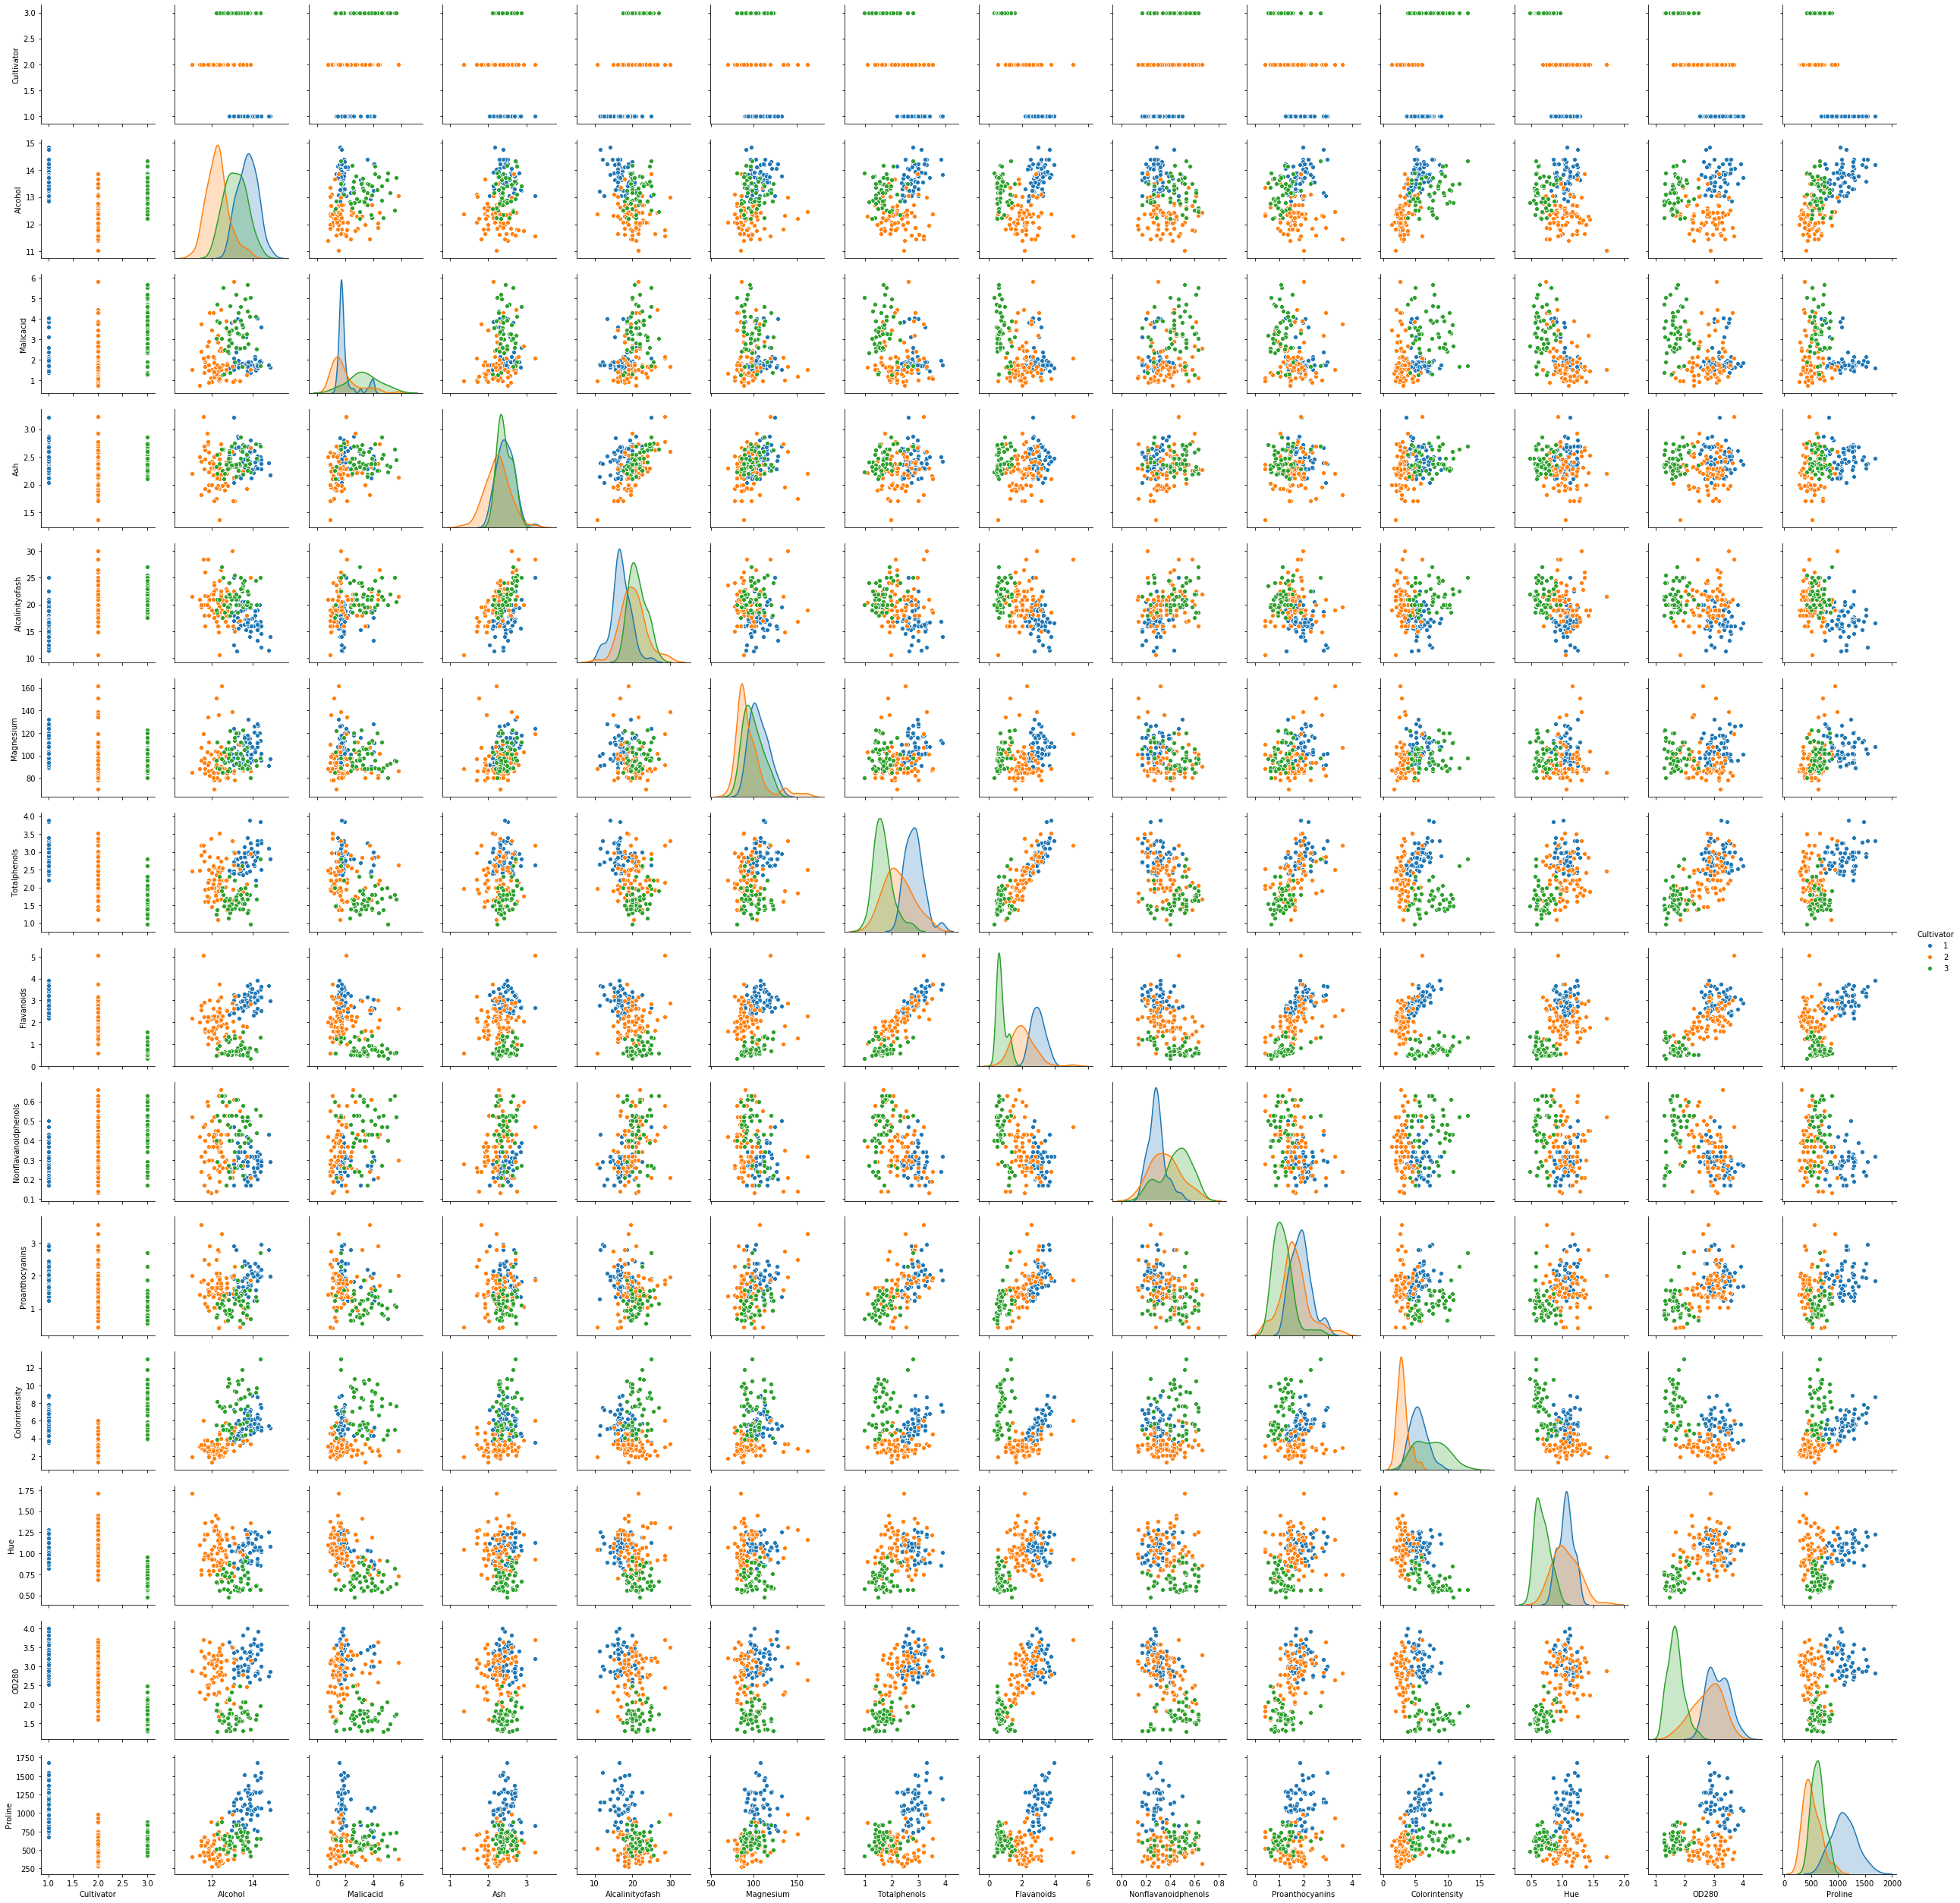

In [11]:
sns.pairplot(df,diag_kind='kde',hue='Cultivator')

- We can observe that for some features of KDE plot (diagonal) the values of different classes are overlapping, individually these may not act as good predictor of target varable
- However, as long as other dimensions which have non overlapping central tendencies, it is not a problem
- Weak predictors sometimes put together act as strong predictors

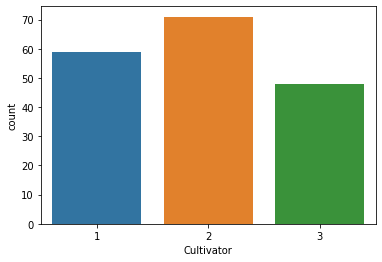

In [21]:
sns.countplot(df['Cultivator'])  # Target Variable distribution

## Splitting of Data

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X=df.drop('Cultivator',axis=1)

In [24]:
y=df['Cultivator']

In [54]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

## Scaling of the Data

In [29]:
from sklearn.preprocessing import StandardScaler

In [55]:
sc=StandardScaler()
sc1=StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc1.fit_transform(x_test)

## Model Building

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix

### Naive Bayes

In [91]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(x_train_scaled,y_train)
print('Training Accuracy is',gb.score(x_train_scaled,y_train))
y_pred=gb.predict(x_test_scaled)
print('Testing Accuracy is',accuracy_score(y_pred,y_test))
print('Confusion Matrix\n', confusion_matrix(y_pred,y_test))

Training Accuracy is 0.971830985915493
Testing Accuracy is 0.9722222222222222
Confusion Matrix
 [[13  0  0]
 [ 1 14  0]
 [ 0  0  8]]


In [95]:
from sklearn.model_selection import cross_val_score

In [111]:
cv=cross_val_score(gb,x_train_scaled,y_train,cv=10)
print('The max Accuracy of cross validation is: ',cv[np.argmax(cv)])

The max Accuracy of cross validation is:  1.0


### KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(df))))
knn.fit(x_train_scaled,y_train)
print('Training Accuracy is',knn.score(x_train_scaled,y_train))
y_pred=knn.predict(x_test_scaled)
print('Testing Accuracy is',accuracy_score(y_pred,y_test))
print('Confusion Matrix\n', confusion_matrix(y_pred,y_test))

Training Accuracy is 0.9647887323943662
Testing Accuracy is 0.9722222222222222
Confusion Matrix
 [[14  0  0]
 [ 0 13  0]
 [ 0  1  8]]


### Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10)
rf.fit(x_train_scaled,y_train)
print('Training Accuracy is',rf.score(x_train_scaled,y_train))
y_pred=rf.predict(x_test_scaled)
print('Testing Accuracy is',accuracy_score(y_pred,y_test))
print('Confusion Matrix\n', confusion_matrix(y_pred,y_test))

Training Accuracy is 1.0
Testing Accuracy is 1.0
Confusion Matrix
 [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
